In [215]:
import numpy as np
from util import *
from dpilqr import plot_solve
import matplotlib.pyplot as plt
import os
import util

In [216]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [217]:
from dpilqr import random_setup,pos_mask


## Load results from centralized simulation:

In [218]:
n_agents = 3
n_states = 6
x_dims = [n_states]*n_agents

In [220]:
data = np.load('simulation_data(drones)/3_drones_centralized_sim_data.npy')

In [221]:
data.shape

(31, 18)

In [222]:
x0,xf = util.paper_setup_3_quads()

In [223]:
x0.T

array([[0., 2., 1., 0., 0., 0., 2., 2., 1., 0., 0., 0., 2., 1., 1., 0.,
        0., 0.]])

In [224]:
xf.T

array([[2., 2., 1., 0., 0., 0., 0., 2., 1., 0., 0., 0., 2., 2., 1., 0.,
        0., 0.]])

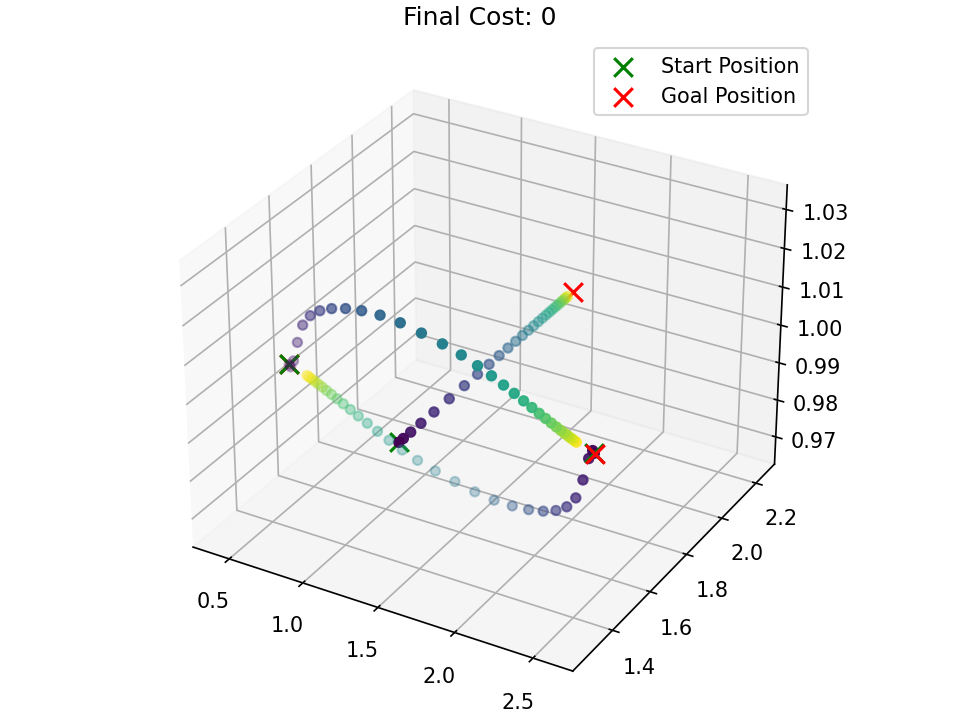

In [225]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
# plt.title('Centralized MPC (IPOPT) for 3 drones');
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);
# plt.savefig('results/Centralized MPC (IPOPT) for 3 drones.png');

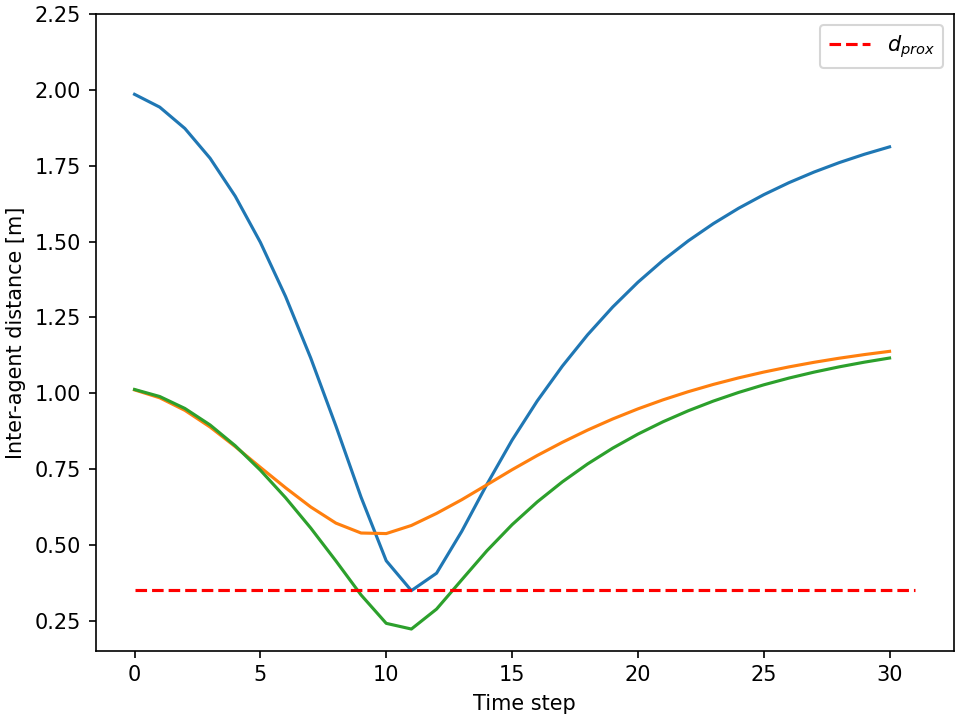

In [226]:
plt.figure(dpi=150)
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.35, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time step")
plt.ylabel("Inter-agent distance [m]")
plt.ylim(0.15,2.25)
np.set_printoptions(precision=0)
plt.legend()
# plt.grid()
# plt.savefig('results/3_drone_pairwise_distance.png')
plt.draw()

## Loading results from distributed IPOPT

In [227]:
n_agents = 3
n_states = 6
x_dims = [n_states]*n_agents

In [228]:
data = np.load('3_drones_distributed_sim_data.npy')

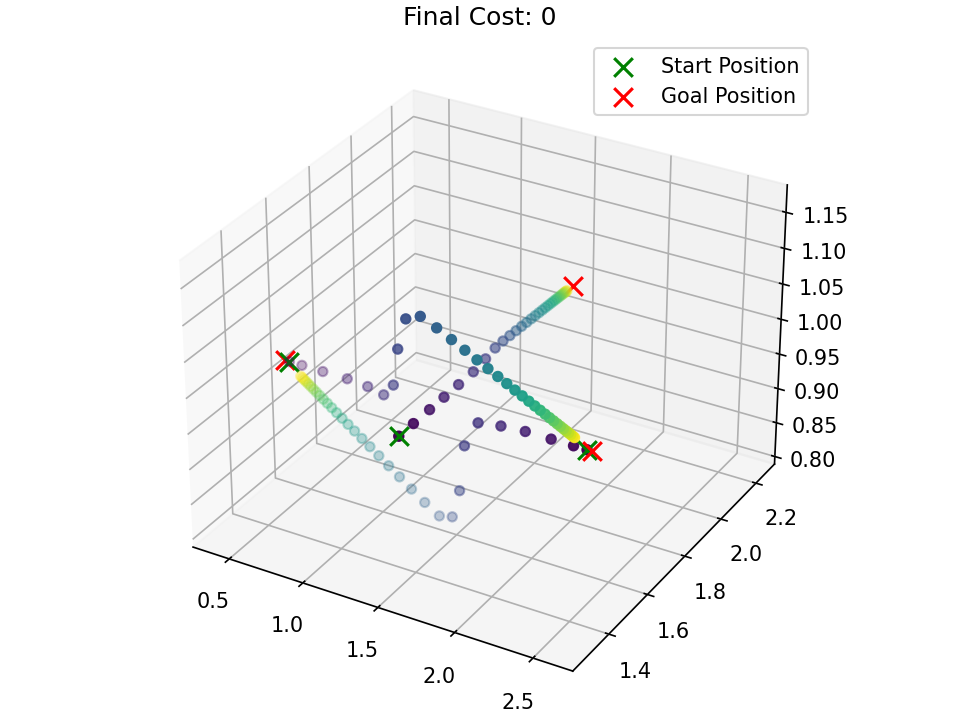

In [229]:
%matplotlib ipympl
plt.figure(dpi=150)
plot_solve(data,0,xf,x_dims,n_d=3)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"]);
# plt.title('Distributed MPC(IPOPT) for 3 drones.png');
# plt.savefig('results/Distributed MPC (IPOPT) for 3 drones.png')

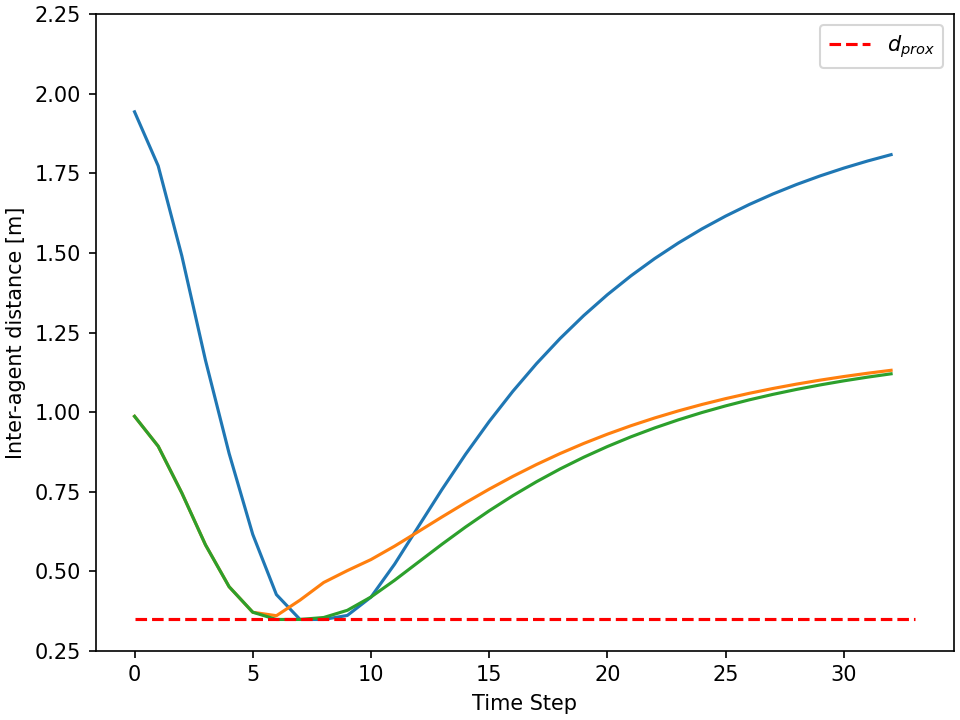

In [230]:
plt.figure(dpi=150)
plt.plot(compute_pairwise_distance(data,x_dims));
plt.hlines(0.35, 0, data.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ hard constraint)")
plt.xlabel("Time Step")
plt.ylabel("Inter-agent distance [m]")
plt.ylim(0.25,2.25)
plt.legend()
# plt.grid()
# plt.savefig('results/3_drone_pairwise_distance(distributed).png')
plt.draw()

### Distributed MPC with collision costs instead of constraints: 

In [137]:
# data_soft = np.load('10_drones_distributed_sim_data(soft_constraint).npy')

In [138]:
# n_agents = 10
# n_states = 6
# x_dims = [n_states]*n_agents


In [139]:
# data_soft.shape

In [140]:
# x0,xf = paper_setup_10_quads()

In [141]:
# %matplotlib ipympl
# plt.figure(dpi=100)
# plot_solve(data_soft,2606.853,xf,x_dims=[6,6,6,6,6,6,6,6,6,6],n_d=3);
# plt.title('Distributed MPC(IPOPT) w/ collision costs');

In [142]:
# plt.figure()
# plt.plot(compute_pairwise_distance(data_soft,x_dims));
# plt.hlines(0.3, 0, data_soft.shape[0], 'r', ls='--', label="$d_{prox}$")
# plt.title("Inter-Agent Distances (w/ coll. costs)")
# plt.xlabel("Time Steps")
# plt.ylabel("Distance")
# plt.legend()
# plt.grid()
# plt.draw()